In [136]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto

### ЗАДАЕМ ПАРАМЕТР Θ

In [137]:
teta = 10

In [138]:
n = 100
prob = 0.95

### ГЕНЕРИРУЕМ ВЫБОРКУ

In [139]:
sample = np.round(pareto.rvs(b = teta - 1 , size = 100), 3)
print(sample)

[1.028 1.342 1.065 1.125 1.181 1.058 1.19  1.004 1.033 1.415 1.045 1.072
 1.056 1.02  1.005 1.147 1.02  1.102 1.12  1.024 1.093 1.023 1.146 1.321
 1.017 1.021 1.035 1.042 1.08  1.047 1.081 1.182 1.075 1.055 1.048 1.123
 1.049 1.069 1.217 1.03  1.152 1.073 1.064 1.05  1.48  1.253 1.051 1.063
 1.324 1.759 1.078 1.135 1.005 1.379 1.448 1.008 1.354 1.004 1.102 1.053
 1.068 1.172 1.069 1.12  1.021 1.278 1.443 1.124 1.187 1.05  1.435 1.086
 1.057 1.165 1.009 1.041 1.085 1.067 1.228 1.01  1.122 1.07  1.032 1.121
 1.087 1.121 1.001 1.181 1.012 1.239 1.067 1.13  1.752 1.243 1.071 1.246
 1.058 1.174 1.076 1.048]


In [140]:
omp = np.round(n / np.sum(np.log(sample)) + 1, 3)
print(f"Оценка методом максимального правдоподобия: {omp}")

Оценка методом максимального правдоподобия: 9.54


In [141]:
def hystogramma(x : list[float], msg) -> None:
    n = int(1 + np.log2(len(x)))
    plt.figure(figsize = (16, 8))
    plt.grid()
    plt.hist(x, bins=n, density=True, color = "royalblue")
    plt.title(msg, fontsize=20)
    plt.show()

In [142]:
nonparam_teta = np.array([])
for _ in range (1000):
    subsample = np.random.choice(sample, 100, replace = True)
    
    i_omp = np.round(n / np.sum(np.log(subsample)) + 1, 3)    
    nonparam_teta = np.append(nonparam_teta, omp - i_omp)

In [143]:
param_teta = np.array([])
for _ in range (50000):
    subsample = np.random.choice(sample, 100, replace = True)
    
    i_omp = np.round(n / np.sum(np.log(subsample)) + 1, 3) 
    param_teta = np.append(param_teta, i_omp)

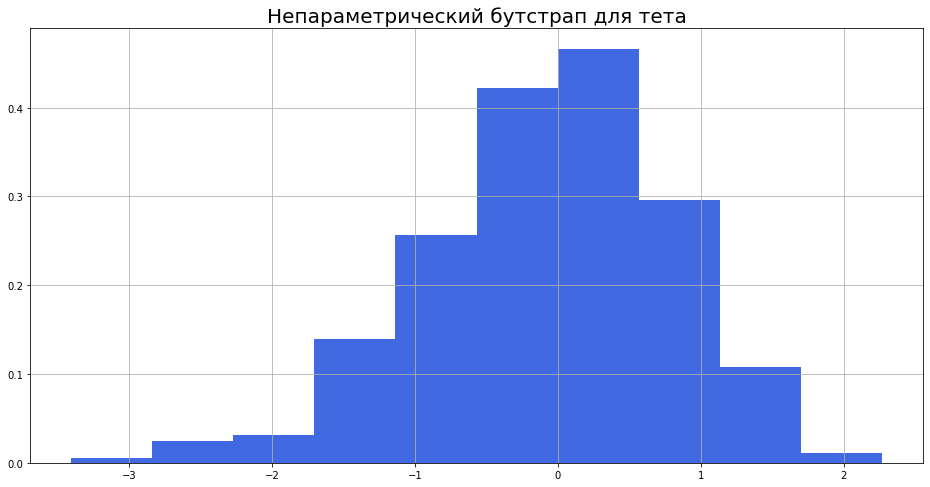

In [144]:
hystogramma(nonparam_teta, "Непараметрический бутстрап для тета")

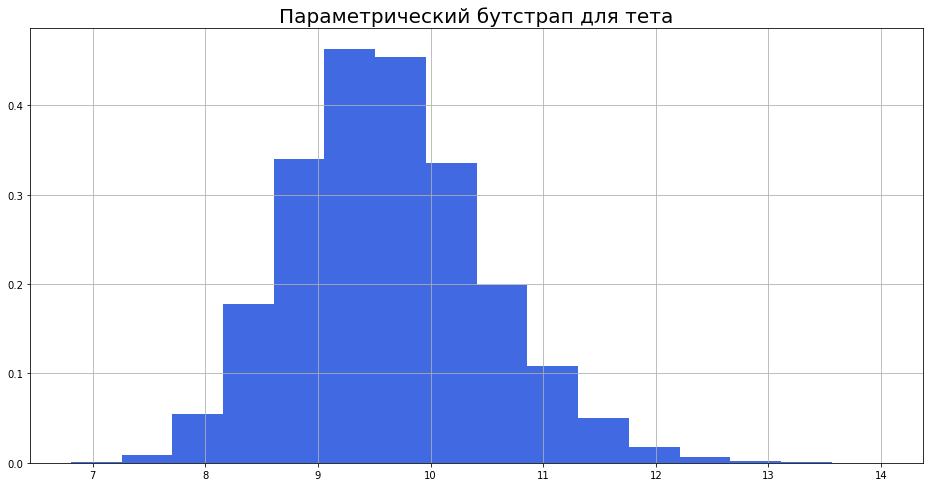

In [145]:
hystogramma(param_teta, "Параметрический бутстрап для тета")

### ДОВЕРИТЕЛЬНЫЙ ИНТЕРВАЛ ДЛЯ МЕДИАНЫ

In [146]:
med_coef = 1.96 * 2 ** (1 / (omp - 1)) * np.log(2) / (n ** 0.5 * (omp - 1))
calc_med = 2 ** (np.sum(np.log(sample)) / 100)
med_left = np.round(calc_med - med_coef, 3)
med_right = np.round(calc_med + med_coef, 3)
med_len = np.round(med_right - med_left, 3)
print(f"Медиана выборки: {np.median(sample)}")
print(f"Доверительный интервал для медианы: ({med_left}, {med_right}), длина интервала - {med_len} ")

Медиана выборки: 1.0755
Доверительный интервал для медианы: (1.067, 1.102), длина интервала - 0.035 


### ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ДЛЯ ТЕТА

In [147]:
coef = 1.96 / (n ** 0.5) * (omp - 1)
tetaleft = np.round(omp - coef, 3)
tetaright = np.round(omp + coef, 3)
tetalen = np.round(tetaright - tetaleft, 3)
print(f"Асимптотический доверительный интервал для тета: ({tetaleft}, {tetaright}), длина интервала - {tetalen} ")

Асимптотический доверительный интервал для тета: (7.866, 11.214), длина интервала - 3.348 


In [148]:
nonparam_teta = np.sort(nonparam_teta)
nonparam_left = omp - nonparam_teta[975]
nonparam_right = omp - nonparam_teta[25]
nonparam_len = np.round(nonparam_right - nonparam_left, 3)
print(f"Бутстраповский непараметрический доверительный интервал для тета: \
({nonparam_left}, {nonparam_right}), длина интервала - {nonparam_len} ")

Бутстраповский непараметрический доверительный интервал для тета: (8.078, 11.489), длина интервала - 3.411 


In [149]:
param_teta = np.sort(param_teta)
n1 = int(np.floor((1 - prob) / 2 * 50000))
n2 = int(np.floor((1 + prob) / 2 * 50000))
param_left = param_teta[n1]
param_right = param_teta[n2]
param_len = np.round(param_right - param_left, 3)
print(f"Бутстраповский параметрический доверительный интервал для тета: \
({param_left}, {param_right}), длина интервала - {param_len} ")

Бутстраповский параметрический доверительный интервал для тета: (8.119, 11.479), длина интервала - 3.36 


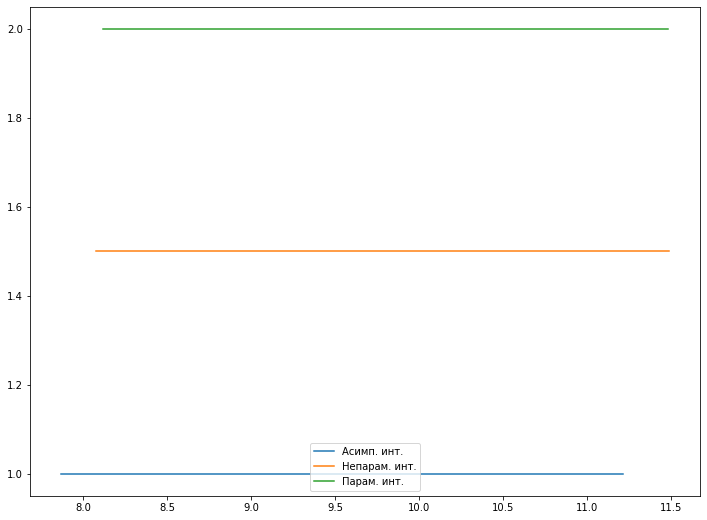

In [150]:
plt.figure(figsize = (12, 9))
plt.plot([tetaleft, tetaright], [1, 1], label = "Асимп. инт.")
plt.plot([nonparam_left, nonparam_right], [1.5, 1.5], label = "Непарам. инт.")
plt.plot([param_left, param_right], [2, 2], label = "Парам. инт.")
plt.legend()
plt.show()

In [151]:
vals = [[tetalen, "Асимптотический доверительный интервал"], 
        [param_len, "Бутстраповский параметрический интервал"], 
        [nonparam_len, "Бутстраповский непараметрический интервал"]]
shortest = min(vals, key = lambda arr : arr[0])
print(f"{shortest[1]} является самым коротким среди доверительных интервалов, его длина: {shortest[0]}")

Асимптотический доверительный интервал является самым коротким среди доверительных интервалов, его длина: 3.348
